# Extract Transform Load

**Extract**: This phase corresponds to getting or sourcing data from single/multiple sources.

*Get the Fashion MNIST dataset from the source*

**Transform**: In this phase, the extracted data is processed and transformed into a structure which is suitable for analyzing the data further.

*Transform the images into tensors*

**Load**: Load the data into a suitable structure for querying and analysis.

*Put our data into objects to make them easily accessible*

In [1]:
# The most important package
import torch

# Package with miscellaneous capabilities for loading image data, transforming etc.
import torchvision
import torchvision.transforms as transforms

import numpy as np

# For visualization of metrics
from torch.utils.tensorboard import SummaryWriter

In [2]:
train_set = torchvision.datasets.FashionMNIST(
    root = './FashionMNIST',
    train = True,
    download = True,
    transform = transforms.Compose([
        transforms.ToTensor()
    ])
)

train_loader = torch.utils.data.DataLoader(train_set, batch_size= 32)

In the object above, following are the arguments while instantiating the object

- root: It specifies the directory substructure where to place the data that will be downloaded.
- train: Whether the data is train data or test data. We are loading trainset so, we specify train = True
- download: If data isn't available in the root directory, download else skip.

These correspond to the **Extract** phase of the ETL cycle. 

- transform: The data needs to be in tensor data-structure for further processing. That's why we specified `toTensor` transformation in this argument.

This is the **Transform** phase. 

Finally, we use the train_loader object which gives an organized object structure to iterate over our images to train the network we'll build to classify the images. This phase is **Load** phase of the cycle.

We can access images using the iterator of python over the train_set object in a one by one fashion. Let's see how.

In [3]:
image, label = next(iter(train_set))

print(image.shape)
print(label)

torch.Size([1, 28, 28])
9


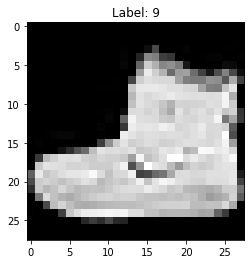

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline 

img = image.reshape([28, 28])
plt.imshow(img, cmap = 'gray')
plt.title(f"Label: {label}")
plt.show();

Now, to access the data in batches, we can use the dataloader object in very much the same way as the datasets object

In [5]:
images, labels = next(iter(train_loader))

print(images.shape)
print(labels.shape)

torch.Size([32, 1, 28, 28])
torch.Size([32])


Since we've defined the batch size as 32 and since all these are grayscale images and the shape of the image is 28 by 28 pixels, therefore the shape.

Labels now is also a torch 1D Tensor of 32 values corresponding to the labels of those 32 images.

- Extend the nn.Module base class
- Define layers as class attributes
- Implement the forward method

To build an NN, we have to create a class which extends or inherits from the nn.Module class of pytorch. 

We will have to then define the layers which make up our network in the constructor so that when we initiate the network, these layers get instantiated to some weights and biases. 

We have to then manually override the forward method which carries out the forward propagation or feed forward function of the network which is used for prediction of labels given an image. Just as an example this is how a simple CNN network class can be coded

In [6]:
import torch.nn as nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 5, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels= 5, out_channels = 12, kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12 * 4 * 4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
    
    def forward(self, t):
        return t

We can access the individual layers in the network using object notation. This is how we can do it. 

In [7]:
netw = Network()
netw

Network(
  (conv1): Conv2d(1, 5, kernel_size=(5, 5), stride=(1, 1))
  (conv2): Conv2d(5, 12, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=60, bias=True)
  (out): Linear(in_features=60, out_features=10, bias=True)
)

In [8]:
print(netw.conv1)

Conv2d(1, 5, kernel_size=(5, 5), stride=(1, 1))


In [9]:
print(netw.fc1)

Linear(in_features=192, out_features=120, bias=True)


In [10]:
# Look at the weights of these layers
print(netw.conv1.weight)

Parameter containing:
tensor([[[[ 0.1614, -0.0626,  0.1028,  0.1643,  0.0151],
          [ 0.0033, -0.0023, -0.0047, -0.0183, -0.0986],
          [-0.0447,  0.1916,  0.1487,  0.1720,  0.0580],
          [ 0.1311, -0.0845, -0.1154,  0.1573, -0.1979],
          [-0.1803,  0.0458,  0.0733, -0.0314,  0.1284]]],


        [[[ 0.0115,  0.0876,  0.1698,  0.0408, -0.1442],
          [-0.1641,  0.1778,  0.1572,  0.1498,  0.1211],
          [-0.0347,  0.0481,  0.1762, -0.1894,  0.0453],
          [-0.0310, -0.0891, -0.1297,  0.0390, -0.1553],
          [-0.0939, -0.1298, -0.0442, -0.1619,  0.1146]]],


        [[[-0.0409,  0.1714,  0.0108,  0.1086, -0.0711],
          [-0.1254, -0.1409,  0.0639,  0.1902, -0.1027],
          [ 0.1519,  0.1819,  0.0393, -0.0866,  0.0919],
          [ 0.1274, -0.0153,  0.1710,  0.1483, -0.0985],
          [-0.0494,  0.0802,  0.0639, -0.0550, -0.0187]]],


        [[[-0.1485,  0.1119, -0.0951,  0.0344,  0.0014],
          [ 0.0892, -0.1807,  0.0752,  0.0086,  0.1790

In [11]:
print(netw.fc1.bias)

Parameter containing:
tensor([-0.0694,  0.0652,  0.0246, -0.0662,  0.0344, -0.0536, -0.0328,  0.0118,
         0.0162, -0.0246, -0.0339,  0.0274,  0.0447,  0.0514,  0.0248, -0.0718,
         0.0495,  0.0534,  0.0001,  0.0019,  0.0137,  0.0676, -0.0552,  0.0007,
         0.0195,  0.0291, -0.0564,  0.0410,  0.0051, -0.0187, -0.0036, -0.0712,
        -0.0531, -0.0528, -0.0670,  0.0087,  0.0260, -0.0654,  0.0558, -0.0017,
        -0.0422,  0.0204, -0.0607,  0.0120,  0.0061,  0.0383,  0.0450,  0.0549,
         0.0685, -0.0628, -0.0070, -0.0428,  0.0374,  0.0718,  0.0514, -0.0143,
         0.0033,  0.0609, -0.0559,  0.0713, -0.0421, -0.0436,  0.0212,  0.0405,
        -0.0439, -0.0337,  0.0320,  0.0294, -0.0459, -0.0232,  0.0377, -0.0397,
         0.0637,  0.0164, -0.0219,  0.0448,  0.0249,  0.0382,  0.0709,  0.0463,
         0.0479,  0.0314,  0.0248,  0.0472, -0.0704,  0.0108, -0.0209, -0.0057,
         0.0588, -0.0340,  0.0445,  0.0208, -0.0312,  0.0579,  0.0469, -0.0383,
         0.0577, -

## Linear Layer

They're also called dense or fully connected layers and generally occupy the last few positions in a CNN architecture before the output layer. 

They have their own weights and biases which can be manually set or changed as and when needed. The weights are an instance of the `Parameter` object though which means when you're setting the weights, you need to ensure you convert that into necessary structure.

The forward pass of a linear layer is implemented by calling several functions. When you say `fc(input)`, it invokes a call to the `__call__` method which calls the `forward` method which calls the `F.linear()`(F being `torch.Functional` package) method which uses `matmul()` to compute the forward pass of the input to the output space.

![](images/Linear_Layer_Transformation.png)

To set the weights manually you may do it this way

```python
# Define a Linear Layer
fc1 = nn.Linear(in_features = 4, out_features = 3, bias = False)

# Define the weight tensor
weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

# Set the weights of the linear layer to the weight tensor
fc1.weight = nn.Parameter(weight_matrix)
```

The result of the following operations given the layer is defined the way it is above will be same
```python
ip =  torch.tensor([1,2,3,4], dtype=torch.float32)

# Matrix multiplication operation of input tensor with weight tensor
print(weight_matrix.matmul(ip))

# Forward pass through the dense layer
print(fc1(ip))
```


In [12]:
in_features = torch.tensor([1,2,3,4], dtype=torch.float32)

weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

weight_matrix.matmul(in_features)

tensor([30., 40., 50.])

In [13]:
fc1 = nn.Linear(in_features = 4, out_features = 3, bias = False)

weight_matrix = torch.tensor([
    [1,2,3,4],
    [2,3,4,5],
    [3,4,5,6]
], dtype=torch.float32)

fc1.weight = nn.Parameter(weight_matrix)

fc1(in_features)

tensor([30., 40., 50.], grad_fn=<SqueezeBackward3>)

## Implementing Forward Propagation

Forward pass or forward propogation is the process of mapping an input tensor to an output tensor. A neural network at the end of the day is nothing but a complex mathematical function.

The forward method can be implemented in the following way. Each layer is specified with the corresponding explanation in the code block below.

In [14]:
import torch.nn as nn
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels = 1, out_channels = 5, kernel_size = 5)
        self.conv2 = nn.Conv2d(in_channels= 5, out_channels = 12, kernel_size = 5)
        
        self.fc1 = nn.Linear(in_features = 12 * 4 * 4, out_features = 120)
        self.fc2 = nn.Linear(in_features = 120, out_features = 60)
        self.out = nn.Linear(in_features = 60, out_features = 10)
    
    def forward(self, t):
        # 1. Input layer
        t = t

        # 2. Convolution layer 1
        # A layer is the one which contains weights. Although relu and maxpool are sometimes
        # referred to as layers, they're simply operations as they don't contain weights.
        t = self.conv1(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # 3. Convolution layer 2
        t = self.conv2(t)
        t = F.relu(t)
        t = F.max_pool2d(t, kernel_size = 2, stride = 2)

        # Flattening the op of convolutional layer to feed it into a dense layer
        # The -1 stands for figure out yourself based on the input (Since batch size may be 
        # different, we keep it open)
        t = t.reshape(-1, 12 * 4 * 4)

        # 4. FC Hidden layer 1
        t = self.fc1(t)
        t = F.relu(t)

        # 5. FC Hidden layer 2
        t = self.fc2(t)
        t = F.relu(t)

        # 6. Output layer
        t = self.out(t)
        t = F.softmax(t, dim = 1)

        return t

In [15]:
# Define the network
model = Network()

# Turn the gradients off for fast computation
torch.set_grad_enabled(False)

# Forward propagation
predictions = model(images)

# For training, again turn on the gradient calculations
torch.set_grad_enabled(True);

In [16]:
print(predictions.argmax(dim = 1))

tensor([5, 5, 9, 5, 5, 5, 4, 5, 9, 9, 5, 5, 9, 9, 9, 4, 5, 5, 4, 9, 5, 5, 5, 5,
        5, 5, 5, 5, 9, 5, 9, 5])


## Backpropogation

This is the algorithm through which the weights are optimized to minimize the loss function. We'll see how to implement it step by step in the following code.

In [17]:
# Calculation of loss

# Feed the images forward through the Neural Network
predictions = model(images)

# Calculate the loss after doing the forward pass
loss = F.cross_entropy(predictions, labels)
print(loss.item())

2.301226854324341


By this step we've passed a batch of images through the network in the forward direction and computed the loss. Now we need to find out the gradient of the loss function with respect to the weights and we can do it as follows. 

Let's first see what happens if we look out for the gradients in the layers before and after backpropagation.

In [18]:
print(model.conv1.weight.grad)

None


In [19]:
# Computing the gradients
loss.backward()

In [20]:
print(model.conv1.weight.grad)

tensor([[[[ 1.4225e-05,  2.3712e-06, -5.7468e-05, -8.5377e-05, -7.6386e-05],
          [ 7.2045e-06, -1.0522e-05, -6.8435e-05, -7.4280e-05, -8.4108e-05],
          [-5.0011e-05, -7.0704e-05, -1.6242e-04, -1.6378e-04, -1.3730e-04],
          [-1.0089e-04, -8.9027e-05, -1.6256e-04, -1.5727e-04, -1.7180e-04],
          [-1.3971e-04, -1.0444e-04, -2.0398e-04, -2.1629e-04, -2.1675e-04]]],


        [[[ 2.5948e-04,  2.3353e-04,  2.0243e-04,  1.5699e-04,  1.5664e-04],
          [ 2.5784e-04,  2.0847e-04,  1.7106e-04,  1.4879e-04,  1.5261e-04],
          [ 2.7675e-04,  2.0152e-04,  1.6958e-04,  1.6067e-04,  1.7119e-04],
          [ 2.0552e-04,  1.8321e-04,  9.3527e-05,  7.8201e-05,  9.6658e-05],
          [ 1.9765e-04,  1.7697e-04,  6.5958e-05,  1.1369e-04,  1.1785e-04]]],


        [[[ 4.4778e-05,  4.9018e-05,  4.5911e-06,  1.9565e-05,  1.2091e-05],
          [ 2.6075e-05,  3.5330e-05,  1.5255e-05,  1.4181e-05,  1.7791e-05],
          [ 3.1841e-05,  1.6221e-05,  9.4828e-06,  3.3171e-05,  4.99

In [21]:
# Updating the weights
from torch import optim

# Every optimizer needs to be passed in the parameters it's gonna update and the learning rate.
# For optimizers other than SGD, there can be other parameters as well which you can play with
# but these ones are key!

optimizer = optim.SGD(model.parameters(), lr = 0.01)

# Updating the weights
optimizer.step()

Possibly the loss would've diminished since we've taken a step in the direction of minimum loss

Let's verify 

In [22]:
predictions = model(images)
loss1 = F.cross_entropy(predictions, labels)
print(loss1.item())

2.301222085952759


Indeed the loss has gone down, by a small amount but gone down nonetheless. This means that backpropagation is working. Now all that's left is repeating the process above for *all batches in a dataloader* which is called one *training epoch* and then repeating this process until we get desirable performance i.e. repeat it for *multiple epochs*. This is done using a for loop as follows.

Keep a check on the `zero_grad()` method. It's important to do so and the reason is specified in the comments.

In [23]:
# Defines the number of times the NN should look at the entire loop 
epochs = 1

for epch in range(epochs):
    
    total_loss = 0
    correct_predictions = 0
    for batch in train_loader:
        # Get the images and labels in a batchwise manner
        images, labels = batch
        
        # Forward pass
        predictions = model(images)
        
        print(predictions.dtype)
        print(labels.dtype)
        print(predictions.shape)
        print(labels.shape)
        
        # Loss calculation
        loss = F.cross_entropy(predictions, labels)
        
        # Accumulate the loss
        total_loss += loss.item()
        
        # Zero out the gradients.If you don't do this, gradients will get accumulated and  
        # the updates will happen incorrectly.
        optimizer.zero_grad()
        
        # Backpropagate the loss
        loss.backward()
        
        # Update the weights of the model
        optimizer.step()
        
        # Get number of correct predictions on the train set
        predictions = predictions.argmax(dim = 1)
        batch_correct = predictions.eq(labels).sum().item()
        correct_predictions += batch_correct
    
    print(f"Epoch: {epch}, Total Loss: {np.round(total_loss, 2)}, Correct Predictions: {correct_predictions}")

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32, 10])
torch.Size([32])
torch.float32
torch.int64
torch.Size([32

## Validation

Now that we know how to train a neural network using pytorch, let's see how to validate our model and understand the predictions of our model. 

In [65]:
def get_predictions(model, loader):
    # Define an empty container
    all_preds = torch.tensor([], dtype = torch.int64)
    
    # Since we're not training, we turn off the gradient computation graph
    # This saves time and space both
    torch.set_grad_enabled(False)
    
    for batch in loader:
        # Get a batch of images
        images, labels = batch
        
        # Predictions from the images (probabilities)
        preds = model(images)
        
        # Get the class labels from predictions
        predictions = preds.argmax(dim = 1)
        
        # Combine the batch's predictions into a single tensor all_preds
        all_preds = torch.cat((all_preds, predictions))
        
    
    # Set the gradient computation back on which you'd turned off earlier
    torch.set_grad_enabled(True)
    
    return all_preds

In [66]:
test_set = torchvision.datasets.FashionMNIST(root = './FashionMNIST', 
                                             train = False, download = True, 
                                             transform = transforms.Compose([transforms.ToTensor()]))

test_loader = torch.utils.data.DataLoader(test_set, batch_size = 32)

In [67]:
predictions = get_predictions(model, test_loader)

In [68]:
preds = predictions.numpy()
ground_truth = test_set.targets.numpy()

from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(ground_truth, preds)

print(f"The classifier's accuracy is {accuracy_score(ground_truth, preds)}")
print(cm)

The classifier's accuracy is 0.7027
[[  0  24  57 132   9   1 753   0  24   0]
 [  0 894   8  66  10   0  21   0   1   0]
 [  0   1 682  20 148   2 118   0  29   0]
 [  0  19  25 817  32   0  96   0  11   0]
 [  0   3 247  54 578   2  84   0  32   0]
 [  0   0   0   1   0 866   0  88   7  38]
 [  0   9 338 103 106   0 406   0  38   0]
 [  0   0   0   0   0  23   0 906   1  70]
 [  0   2  20   4   6   4   9   6 948   1]
 [  0   0   0   0   0  12   0  57   1 930]]


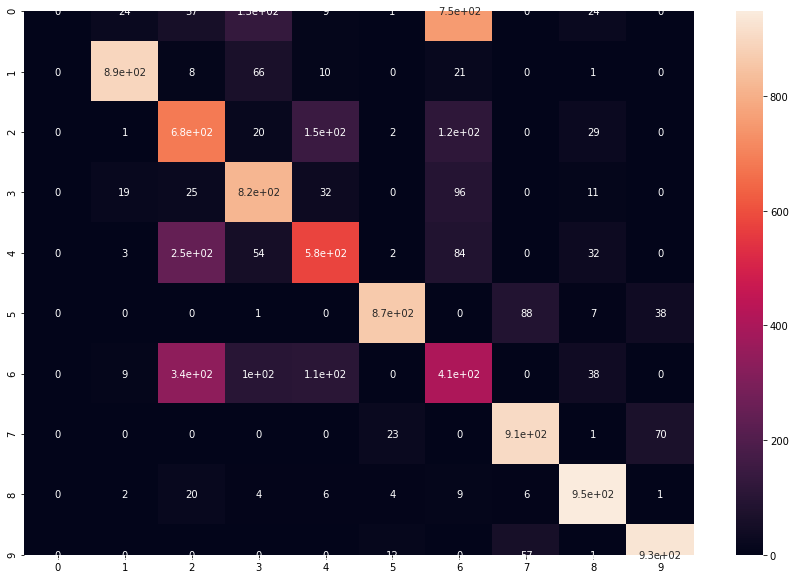

In [69]:
import seaborn as sns
plt.figure(figsize=(15, 10))
sns.heatmap(cm, annot = True)
plt.show();

# Tensorboard Visualization

In [75]:
tb = SummaryWriter()

network = Network()
images, labels = next(iter(train_loader))
grid = torchvision.utils.make_grid(images)

# Add images to the tb dashboard
tb.add_image('images', grid)

# Add graph i.e. network structure to the tb dashboard
tb.add_graph(network, images)
tb.close()

In [79]:
# Adding the tensorboard calls in our training loop
# Defines the number of times the NN should look at the entire loop 
epochs = 10
torch.set_grad_enabled(True)
tb = SummaryWriter()
for epch in range(epochs):
    
    total_loss = 0
    correct_predictions = 0
    for batch in train_loader:
        # Get the images and labels in a batchwise manner
        images, labels = batch
        
        # Forward pass
        predictions = model(images)
        
        # Loss calculation
        loss = F.cross_entropy(predictions, labels)
        
        # Accumulate the loss
        total_loss += loss.item()
        
        # Zero out the gradients.If you don't do this, gradients will get accumulated and  
        # the updates will happen incorrectly.
        optimizer.zero_grad()
        
        # Backpropagate the loss
        loss.backward()
        
        # Update the weights of the model
        optimizer.step()
        
        # Get number of correct predictions on the train set
        predictions = predictions.argmax(dim = 1)
        batch_correct = predictions.eq(labels).sum().item()
        correct_predictions += batch_correct
    
    tb.add_scalar('Loss', total_loss, epch)
    tb.add_scalar('Number Correct', correct_predictions, epch)
    tb.add_scalar('Accuracy', correct_predictions / len(train_set), epch)
    
    tb.add_histogram('conv1.bias', network.conv1.bias, epch)
    tb.add_histogram('conv1.weight', network.conv1.weight, epch)
#     tb.add_histogram('conv1.weight.grad',network.conv1.weight.grad,epch)
                     
    print(f"Epoch: {epch}, Total Loss: {np.round(total_loss, 2)}, Correct Predictions: {correct_predictions}")
tb.close()

Epoch: 0, Total Loss: 3235.56, Correct Predictions: 44285
Epoch: 1, Total Loss: 3226.69, Correct Predictions: 44539
Epoch: 2, Total Loss: 3219.57, Correct Predictions: 44756
Epoch: 3, Total Loss: 3214.09, Correct Predictions: 44917
Epoch: 4, Total Loss: 3208.38, Correct Predictions: 45092
Epoch: 5, Total Loss: 3203.49, Correct Predictions: 45263
Epoch: 6, Total Loss: 3199.09, Correct Predictions: 45363
Epoch: 7, Total Loss: 3195.44, Correct Predictions: 45526
Epoch: 8, Total Loss: 3191.32, Correct Predictions: 45628
Epoch: 9, Total Loss: 3187.07, Correct Predictions: 45781
